### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from neuropy import plotting
from scipy.ndimage import gaussian_filter1d
from scipy import stats
from neuropy.analyses import Pf1D
from neuropy.utils.signal_process import filter_sig
import subjects
import pandas as pd

### A sample run with CA1 cells, LFP, Actual position and decoded position
- something similar to Fig1C of Tang2021

Note: speed_thresh is ignored when epochs is provided


(11420.22, 11420.5, -343.36475840714104, 381.8627658365444)

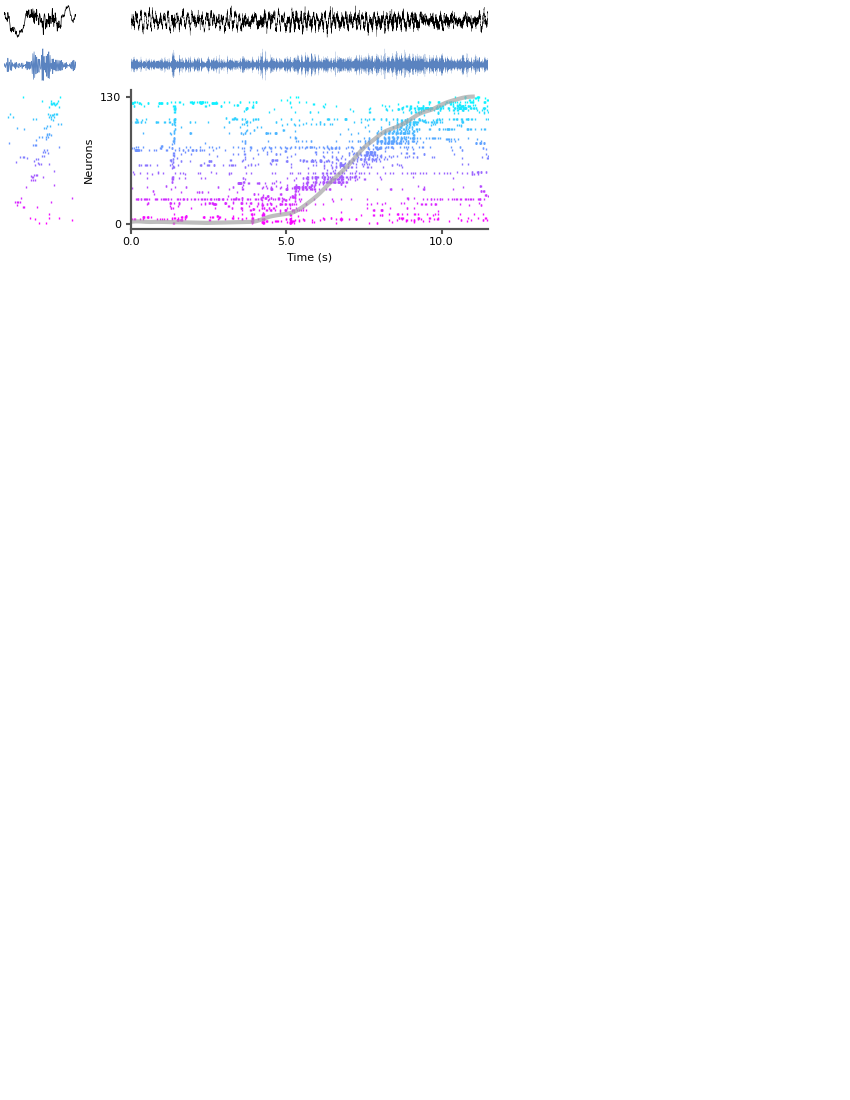

In [2]:
sess = subjects.nsd.ratUday2[0]
maze = sess.paradigm["maze"].flatten()
maze_pos = sess.maze
maze_run = sess.maze_run
neurons = sess.neurons.get_neuron_type("pyr")
pf = Pf1D(
    neurons=neurons,
    position=maze_pos,
    sigma=4,
    grid_bin=2,
    epochs=maze_run["up"],
    frate_thresh=0.5,
)


# run_epoch = maze_run[200].flatten()+np.array([-2,2])
run_epoch = [11419, 11430.5]
# run_epoch = maze
neurons_sorted = sess.neurons[pf.get_sort_order("neuron_id")].time_slice(*run_epoch)
pos_epoch = maze_pos.time_slice(*run_epoch)

fig = plotting.Fig(grid=(30, 11))

sig_ax = fig.subplot(fig.gs[0, 1:6])
signal = sess.eegfile.get_signal(99, *run_epoch)
sig_ax.plot(signal.time, signal.traces[0], "k", lw=0.2)
sig_ax.set_xlim(run_epoch)
sig_ax.axis("off")

rpl_signal = filter_sig.bandpass(signal, lf=150, hf=250)
rpl_ax = fig.subplot(fig.gs[1, 1:6], sharex=sig_ax)
rpl_ax.plot(signal.time, rpl_signal.traces[0], "#4a77bae8", lw=0.1)
rpl_ax.set_xlim(run_epoch)
rpl_ax.axis("off")


ax = fig.subplot(fig.gs[2:6, 1:6], sharex=sig_ax)
plotting.plot_raster(neurons_sorted, color="cool_r", ax=ax, markersize=2)


ax2 = ax.twinx()

ax2.plot(pos_epoch.time - 0.5, pos_epoch.x, color="#a3a3a3", alpha=0.7, lw=3)
# ax2.set_ylim([-2,385])
ax2.set_yticks([])

xticks = np.arange(run_epoch[0], run_epoch[1], 5)
ax.set_xticks(xticks, xticks - xticks[0])
ax.tick_params(rotation=0)

ax.set_yticks([0, len(neurons_sorted)])

r_ep = [11420.22, 11420.5]
replay_ax = fig.subplot(fig.gs[2:6, 0])
plotting.plot_raster(
    neurons_sorted.time_slice(11420.22, 11420.5), ax=replay_ax, color="cool_r"
)
replay_ax.axis("off")

sig_ax = fig.subplot(fig.gs[0, 0], sharex=replay_ax)
signal = signal.time_slice(None, *r_ep)
sig_ax.plot(signal.time, signal.traces[0], "k", lw=0.5)
sig_ax.axis("off")


rpl_ax = fig.subplot(fig.gs[1, 0], sharex=replay_ax)
replay_sig = rpl_signal.time_slice(None, *r_ep)
rpl_ax.plot(
    replay_sig.time, rpl_signal.time_slice(None, *r_ep).traces[0], "#4a77bae8", lw=0.5
)
# rpl_ax.set_xlim(run_epoch)
rpl_ax.axis("off")


In [3]:
fig.savefig(subjects.figpath_sd/'replay_decoding_example')